In [1]:
using EO, Plots, Lasso

ERROR: Method overwriting is not permitted during Module precompilation. Use `__precompile__(false)` to opt-out of precompilation.


compiled


In [2]:
#= domain = collect(LinRange(-10, 10, 10000))
y = sin.(3*domain)
plot(domain, y) =#

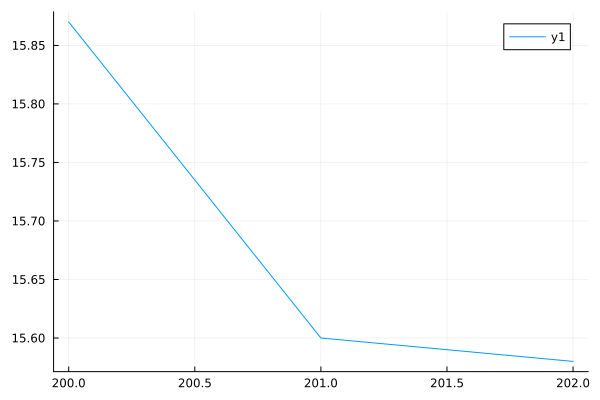

In [3]:
using CSV, DataFrames, EO, Plots, Statistics
x = collect(200:1:302)

data = CSV.read("../trading_data/archive(4)/sp500_stocks.csv", DataFrame)
price = filter("Symbol" => x->x == "EA", data).Open
y = float.(price[x])
#y = EO.signal_mean(y)
#y = signal_mean(denoise(float.(price[x])))

domain = float.(x)
plot(domain, y)

In [4]:
function protected_div(x, y)
    if y == 0
        return x/1e-14
    end
    return x/y
end
function square(x)
    return x^2
end
function cube(x)
    return x^3
end
logaritmus(x) = log(abs(x))
exponenciala(x) = exp(abs(x))
power(x, y) = min(abs(x)^y, 1e10)

power (generic function with 1 method)

In [590]:
variables = [domain]
#= operations = Vector{Function}([+, -, *, protected_div, sin, cos, square, cube, logaritmus, power])
arities =    [2,2,2,2,1,1, 1, 1, 1, 2] =#
operations = Vector{Function}([+, -, *, protected_div, sin, square, cube, logaritmus])
arities =    [2,2,2,2,1,1,1,1]
exprs = Vector{Any}([:x])

best_model, models_hist = EO.feature_synthesis(y, variables, operations, arities, exprs, 100, q=10, μ=3, max_depth=15);

In [ ]:
c = model.coefficients[:, end]
i = 1
for e in model.expressions
    println(round(c[i], digits=3), "\t * ", e)
    i = i +1
end

In [ ]:
# prediction on the training data
features    = EO.extract_features(models_hist, float.(x))
maximal_value = maximum(float.(price[x]))+abs(maximum(float.(price[x]))-minimum(float.(price[x])))
minimal_value = minimum(float.(price[x]))-abs(maximum(float.(price[x]))-minimum(float.(price[x])))
prediction  = #= EO.denoise( =#EO.prediction(best_model, float.(x), features; λ=maximal_value, α=minimal_value)#= ) =#
p = plot(prediction, label="regression")
plot!(p, price[x], label="true function", xlabel="day", ylabel="dollars")
#savefig(p, "../images/NFS_regression.svg")
p

In [ ]:
xt = collect(2:1:120)

# prediction on the training data
features    = EO.extract_features(models_hist, float.(xt))
maximal_value = maximum(float.(price[xt]))+abs(maximum(float.(price[xt]))-minimum(float.(price[xt])))
minimal_value = minimum(float.(price[xt]))-abs(maximum(float.(price[xt]))-minimum(float.(price[xt])))
prediction  = #= EO.denoise( =#EO.prediction(best_model, float.(xt), features; λ=maximal_value, α=minimal_value)#= ) =#
p = plot(prediction, label="regression")
plot!(p, price[xt], label="true function", xlabel="day", ylabel="dollars")
#savefig(p, "../images/NFS_prediction.svg")

In [594]:
#= #x=collect(LinRange(-10, 50, 1000))
x = domain;
x = float.(collect(1000:1:2100));
x = collect(1800:1:2100+200); =#

In [595]:
#= features = EO.extract_features(models, float.(x))
p = plot(x, EO.prediction(model, float.(x), features), label="prediction")
plot!(p, x, float.(price[x]), label="truth") =#

In [596]:
#= features = EO.extract_features(models, float.(x))
p = plot(x, EO.signal_mean(EO.denoise(EO.prediction(model, float.(x), features))), label="prediction")
plot!(p, x, EO.signal_mean(EO.denoise(float.(price[x]))), label="truth") =#

In [597]:
#= features = EO.extract_features(models, float.(x))
p = plot(x, EO.denoise(EO.prediction(model, float.(x), features)), label="prediction")
plot!(p, x, EO.denoise(float.(price[x])), label="truth") =#

In [598]:
#= signal = EO.prediction(model, float.(x), features)

p = plot(x, signal, size=(1000,600), label="original")
plot!(p, x, EO.signal_mean(signal), label="mean of original")
plot!(p, x, EO.denoise(signal), label="denoised")
plot!(p, x, EO.signal_mean(EO.denoise(signal)), label="mean of denoised") =#